In [131]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.linear_model import BayesianRidge
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn import metrics


In [132]:
# import aiport data
df = pd.read_csv('M1_final.csv')


In [133]:
# check number of rows and columns
print(df.shape)

# check data types
df.info()

(28820, 23)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28820 entries, 0 to 28819
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   MONTH              28820 non-null  int64  
 1   DAY_OF_MONTH       28820 non-null  int64  
 2   DAY_OF_WEEK        28820 non-null  int64  
 3   OP_UNIQUE_CARRIER  28820 non-null  object 
 4   TAIL_NUM           28820 non-null  object 
 5   DEST               28820 non-null  object 
 6   DEP_DELAY          28820 non-null  int64  
 7   CRS_ELAPSED_TIME   28820 non-null  int64  
 8   DISTANCE           28820 non-null  int64  
 9   CRS_DEP_M          28820 non-null  int64  
 10  DEP_TIME_M         28820 non-null  int64  
 11  CRS_ARR_M          28820 non-null  int64  
 12  Temperature        28820 non-null  int64  
 13  Dew Point          28820 non-null  object 
 14  Humidity           28820 non-null  int64  
 15  Wind               28818 non-null  object 
 16  Wind Speed

In [134]:
# Convert dewpoint to numeric 
df["Dew Point"] = df["Dew Point"].astype("int64")

In [135]:
# check for missing values
df.isnull().sum()

MONTH                0
DAY_OF_MONTH         0
DAY_OF_WEEK          0
OP_UNIQUE_CARRIER    0
TAIL_NUM             0
DEST                 0
DEP_DELAY            0
CRS_ELAPSED_TIME     0
DISTANCE             0
CRS_DEP_M            0
DEP_TIME_M           0
CRS_ARR_M            0
Temperature          0
Dew Point            0
Humidity             0
Wind                 2
Wind Speed           0
Wind Gust            0
Pressure             0
Condition            0
sch_dep              0
sch_arr              0
TAXI_OUT             0
dtype: int64

In [136]:
# remove 2 missing values from 'Wind' column
df[df["Wind"].isna()]
df.dropna(inplace=True)

C:\Users\ibmmo\AppData\Local\Temp\ipykernel_15236\3969842624.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True,cmap="crest", linewidths=1)


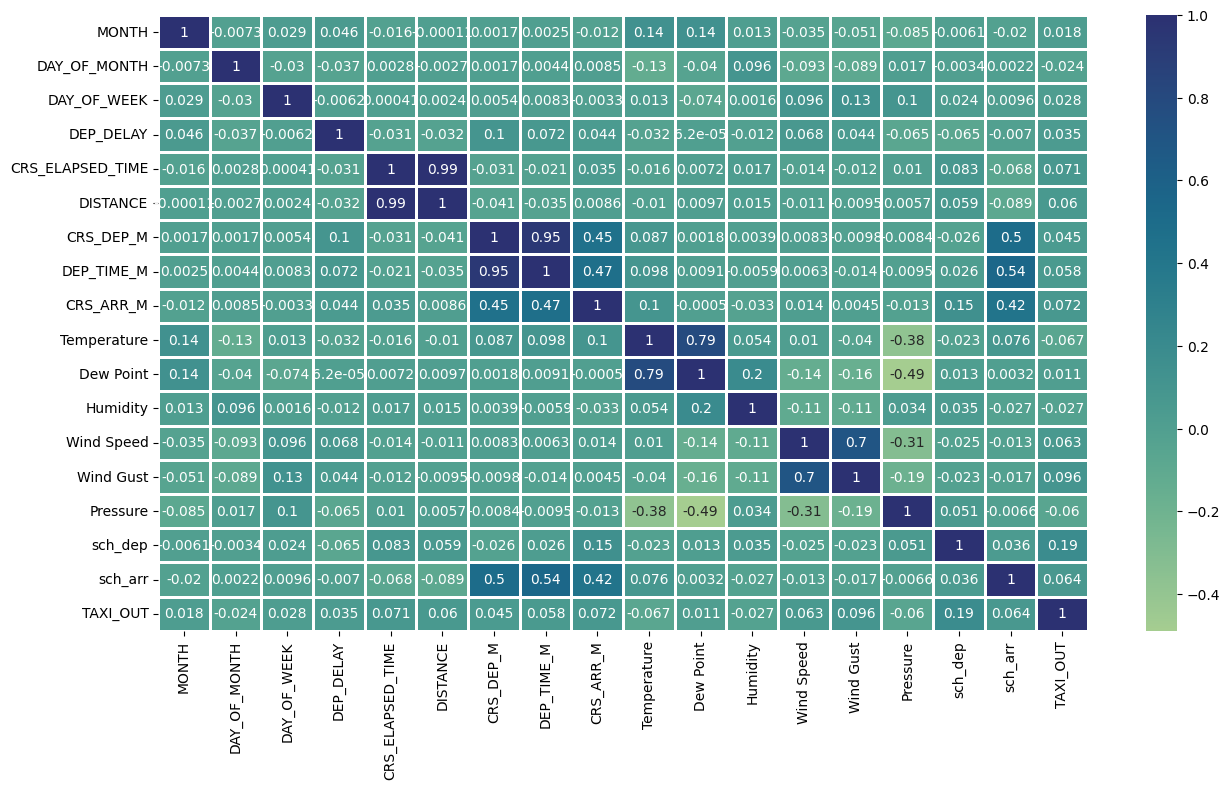

In [137]:
# PLot the correlation matrix to see the correlation between the variables

plt.figure(figsize=(15,8))
sns.heatmap(df.corr(),annot=True,cmap="crest", linewidths=1)
plt.show()

In [138]:
# We can carry out label encoding on the categorical variables

# Assingn numbers to each column
df.columns=[i for i in range(1,24)]

# Display variables with object data type
object=df.select_dtypes(include="object")
object


,4,5,6,16,20
0,B6,N828JB,CHS,W,Fair / Windy
1,B6,N992JB,LAX,W,Fair / Windy
2,B6,N959JB,FLL,W,Fair / Windy
3,B6,N999JQ,MCO,W,Fair / Windy
4,DL,N880DN,ATL,W,Fair / Windy
...,...,...,...,...,...
28815,B6,N216JB,ORH,N,Cloudy
28816,AA,N104NN,BOS,N,Cloudy
28817,AS,N581AS,SEA,N,Cloudy
28818,B6,N957JB,SJU,N,Cloudy


In [139]:

# Use label encoder to convert the categorical variables to numeric
label_encoder = preprocessing.LabelEncoder()
df[4]= label_encoder.fit_transform(df[4])
df[5]= label_encoder.fit_transform(df[5])
df[6]= label_encoder.fit_transform(df[6])
df[16]= label_encoder.fit_transform(df[16])
df[20]= label_encoder.fit_transform(df[20])

In [140]:
# Assign relevant columns to X and y
X = df.drop([23],axis=1)
y = df[23]

In [141]:
# split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [142]:
# feature scaling
# noramlize the data to account for large and small numbers
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [143]:
# Linear regression
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

LinearRegression()

In [144]:
# Predict the test set results using the linear regression model
pred_lin = lin_reg.predict(X_test)

In [145]:
# Create a dataframe to compare the actual and predicted values
pd.DataFrame({'Actual': y_test, 'Predicted': pred_lin})

,Actual,Predicted
7821,14,24.748739
23733,25,24.046713
21390,25,24.632439
10152,26,22.667357
11680,27,22.878464
...,...,...
907,10,17.126377
3899,23,19.319057
17351,19,21.821774
15084,22,21.685560


In [146]:
# Display the metrics for the linear regression model
print('MAE:', metrics.mean_absolute_error(y_test, pred_lin))
print('MSE:', metrics.mean_squared_error(y_test, pred_lin))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred_lin)))
print('R2:', metrics.r2_score(y_test, pred_lin))

MAE: 5.191637220063265
MSE: 41.876630990621614
RMSE: 6.471215572875131
R2: 0.09372858011552043


In [147]:
# Ridge regression

model_ridge = Ridge(alpha=0.5, random_state= 32)
model_ridge.fit(X_train, y_train)

Ridge(alpha=0.5, random_state=32)

In [148]:
# Predict the test set results using the ridge regression model

pred_ridge = model_ridge.predict(X_test)
pd.DataFrame({'Actual': y_test, 'Predicted': pred_ridge})

,Actual,Predicted
7821,14,24.747140
23733,25,24.042934
21390,25,24.633040
10152,26,22.666878
11680,27,22.877505
...,...,...
907,10,17.127790
3899,23,19.316724
17351,19,21.820851
15084,22,21.686419


In [149]:
# Display the metrics for the ridge regression model

print('MAE:', metrics.mean_absolute_error(y_test, pred_ridge))
print('MSE:', metrics.mean_squared_error(y_test, pred_ridge))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred_ridge)))
print('R2:', metrics.r2_score(y_test, pred_ridge))

MAE: 5.19161013832022
MSE: 41.875984059935206
RMSE: 6.471165587429764
R2: 0.09374258063986696


In [150]:
# Lasso regression
model_lasso = Lasso(alpha=0.5, random_state= 32)
model_lasso.fit(X_train, y_train)

Lasso(alpha=0.5, random_state=32)

In [151]:
# Predict the test set results using the lasso regression model
pred_lasso = model_lasso.predict(X_test)
pd.DataFrame({'Actual': y_test, 'Predicted': pred_lasso})


,Actual,Predicted
7821,14,21.294584
23733,25,20.897670
21390,25,21.879230
10152,26,21.483950
11680,27,20.897670
...,...,...
907,10,19.306338
3899,23,19.473847
17351,19,21.651459
15084,22,20.478899


In [152]:
# Display the metrics for the lasso regression model

print('MAE:', metrics.mean_absolute_error(y_test, pred_lasso))
print('MSE:', metrics.mean_squared_error(y_test, pred_lasso))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred_lasso)))
print('R2:', metrics.r2_score(y_test, pred_lasso))


MAE: 5.370698137284513
MSE: 44.539279009132265
RMSE: 6.673775468888077
R2: 0.03610499045930704


In [153]:
# We will now create an array to store the error values for each model
# RMSE will be used to evaluate the models
# It will store the error between the actual and predicted values
# The lower the RMSE, the better the model

from sklearn.metrics import mean_squared_error 
RMSE=[]
def error(y_pred,y_test):
 rmse = mean_squared_error(y_pred,y_test, squared=False)
 RMSE.append(np.sqrt(mean_squared_error(y_pred,y_test)))
 return(rmse)

Can explore the RMSE array to compare results of the regression analysis for future work